# Plotting separate PTE terms for
## simulation channel_2km_0005 regridded to 1x1 and 0.25x0.25 deg latlon
# and
## simulation channel_80km_0005 regridded to 1x1

Ting-Chen Chen (ting-chen.chen@kit.edu) 

In [1]:
# set time step in hours
dt = 6

if   dt == 1:
     data_dt = '1hrly'
elif dt == 6:
     data_dt = '6hrly'

# set upper level of PTE analysis
p2level = 50

# set boxsize around location of minimum surface pressure of PTE analysis
boxsize =  6

In [2]:
# set strings to handle sims within this notebook
exp_name = {
    1: 'channel_80km_0005',
    2: 'channel_2km_0005',
    3: 'channel_2km_0005'
    }

In [3]:
# set strings to handle regridded sims within this notebook
str_regridded_sim = {
    1: 'channel_80km_0005',
    2: 'channel_2km_0005',
    3: 'channel_2km_0005_025x025'
    }

In [4]:
# set data_res strings for loading data
data_res = {
    1: '1x1latlon',
    2: '1x1latlon',
    3: '025x025latlon'
    }

In [5]:
# set strings to handle grids within this notebook
str_grid = {
    1: '80km 1x1',
    2: '2km 1x1',
    3: '2km 0.25x0.25'
    }

In [6]:
TC_work = '/work/bb1152/Module_A/A6_CyclEx/b382037_TingChen/Task3/PTE/'
# this is indicated here specifically for the 0.25 latlon remap
CB_scratch = '/scratch/b/b380782/check_remapping_on_PTE/'+exp_name[3]+'/PTE_out/'

In [10]:
path_track = {
    1: TC_work+'cyclone_PTE_timeseries/',
    2: TC_work+'cyclone_PTE_timeseries/',
    3: CB_scratch+'cyclone_PTE_timeseries/'
}

In [11]:
### Not required anymore. Keeping this to have an overview about sims.

#####################################################
# cyclone specific data
#####################################################
# channel_Xkm_0001: control simulations
# channel_Xkm_0002: +4K, qv consistent with T
# channel_Xkm_0003: +4k, qv from control
# channel_Xkm_0004: +temperature anomaly from MPI-ESM1-2-LR far future
# channel_Xkm_0005: +tropical temperature anomaly from MPI-ESM1-2-LR far future
# channel_Xkm_0006: +polar temperature anomaly from MPI-ESM1-2-LR far future

# Note that the  2-km experiments contain outputs every 6 hrs
# Note that the 80-km experiments contain outputs every 1 hrs


expname = {
      1: 'CTL_RH0',    
      2: '4K_RH0',
      3: '4K_RH-',
      4: 'Tanom_RH0',
      5: 'Tanom_TR_RH0',
      6: 'Tanom_PO_RH0'
         }

exp80 = { 
      1:'channel_80km_0001',
      2:'channel_80km_0002',
      3:'channel_80km_0003',
      4:'channel_80km_0004',
      5:'channel_80km_0005',
      6:'channel_80km_0006',
      }

exp2 = { 
      1:'channel_2km_0001',
      2:'channel_2km_0002',
      3:'channel_2km_0003',
      4:'channel_2km_0004',
      5:'channel_2km_0005',
      6:'channel_2km_0006',
      }


In [12]:
import numpy as np
import pandas as pd
import scipy as sp
import scipy.ndimage
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib.patches as patches
import psutil
import datetime
import time as tm
import seaborn as sns
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import warnings
warnings.filterwarnings("ignore")

In [13]:
# define function to load path track data that has previously been stored in csv files
def load_path_track_data(exp_str,expname,data_res,path_track,dur,dp,dfi,ep,itt,eq1res,tadv,vmt,diab,eq2res,diabptend,lon,lat,pmin):
    
    ifile    ='PTE_for_'+expname+'_'+data_dt+'_'+data_res+'_upper'+str(int(p2level))+'hPa_box'+str(int(boxsize))+'.csv'
    df_track = pd.read_csv(path_track+ifile)

    dur[exp_str] = df_track['time']+1 
    dp[exp_str]        = df_track['dp'] 
    dfi[exp_str]       = df_track['dfi']                      
    ep[exp_str]        = df_track['ep']    
    itt[exp_str]       = df_track['itt'] 
    eq1res[exp_str]    = df_track['eq1res']                     
    tadv[exp_str]      = df_track['tadv']
    vmt[exp_str]       = df_track['vmt']
    diab[exp_str]      = df_track['diab']
    eq2res[exp_str]    = df_track['eq2res'] 
    diabptend[exp_str] = df_track['diabptend']
    
    lon[exp_str] = df_track['lon']
    lat[exp_str] = df_track['lat']
    
    pmin[exp_str] = df_track['pmin']
    
    return dur,dp,dfi,ep,itt,eq1res,tadv,vmt,diab,eq2res,diabptend,lon,lat,pmin

In [14]:
#####################################################
# Read in PTE track data from file
#####################################################
#
#path_track = '/work/bb1152/Module_A/A6_CyclEx/b382037_TingChen/Task3/PTE/cyclone_PTE_timeseries/'

# initialize dictionaries
dur = {}
dp = {}
dfi = {}
ep = {}
itt = {}
eq1res = {}
tadv = {}
vmt = {}
diab = {}
eq2res = {}
diabptend = {}

lon = {}
lat = {}

pmin = {}

# fill dictionaries
for i in range(1,4):
    dur,dp,dfi,ep,itt,eq1res,tadv,vmt,diab,eq2res,diabptend,lon,lat,pmin = load_path_track_data(str_regridded_sim[i],
                                                                                               exp_name[i],
                                                                                               data_res[i],
                                                                                                path_track[i],
                                                                                           dur,
                                                                                           dp,
                                                                                           dfi,
                                                                                           ep,
                                                                                           itt,
                                                                                           eq1res,
                                                                                           tadv,
                                                                                           vmt,
                                                                                           diab,
                                                                                           eq2res,
                                                                                           diabptend,
                                                                                           lon,
                                                                                           lat,
                                                                                            pmin)

# PLOT the time evolution of the cyclone-associated PTE 

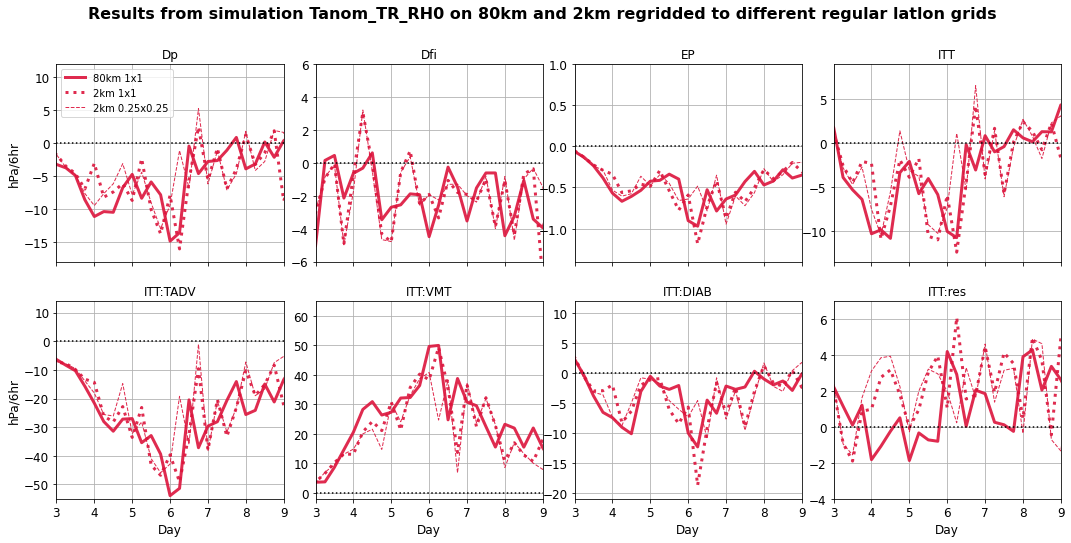

In [15]:
# Separating the two equations #
plt.rcParams['savefig.facecolor']='white'
# Eq.1 ------
# color codes for sims defined by TC
#colors={1:'dimgray',2:'gold',3:'mediumseagreen',4:'darkorange',5:'crimson',6:'royalblue'}
colors={1:'crimson',2:'crimson',3:'crimson'}
lstyle={1:'solid',2:'dotted',3:'dashed'}
lw={1:3,2:3,3:1}

fig, ax = plt.subplots(2, 4, figsize=(18,8), sharex=True, sharey=False)
for i in range(1,4): # loop over simulations
    ax[0,0].plot(dur[str_regridded_sim[i]], dp[str_regridded_sim[i]], color=colors[i],
               linewidth=lw[i], label=str_grid[i], alpha=0.9, linestyle=lstyle[i])
    ax[0,1].plot(dur[str_regridded_sim[i]], dfi[str_regridded_sim[i]], color=colors[i],
               linewidth=lw[i], label=str_grid[i], alpha=0.9, linestyle=lstyle[i])
    ax[0,2].plot(dur[str_regridded_sim[i]], ep[str_regridded_sim[i]], color=colors[i],
               linewidth=lw[i], label=str_grid[i], alpha=0.9, linestyle=lstyle[i])
    ax[0,3].plot(dur[str_regridded_sim[i]], itt[str_regridded_sim[i]], color=colors[i],
               linewidth=lw[i], label=str_grid[i], alpha=0.9, linestyle=lstyle[i])
    ax[1,0].plot(dur[str_regridded_sim[i]], tadv[str_regridded_sim[i]], color=colors[i],
               linewidth=lw[i], label=str_grid[i], alpha=0.9, linestyle=lstyle[i])
    ax[1,1].plot(dur[str_regridded_sim[i]], vmt[str_regridded_sim[i]], color=colors[i],
               linewidth=lw[i], label=str_grid[i], alpha=0.9, linestyle=lstyle[i])
    ax[1,2].plot(dur[str_regridded_sim[i]], diab[str_regridded_sim[i]], color=colors[i],
               linewidth=lw[i], label=str_grid[i], alpha=0.9, linestyle=lstyle[i])
    ax[1,3].plot(dur[str_regridded_sim[i]], eq2res[str_regridded_sim[i]], color=colors[i],
               linewidth=lw[i], label=str_grid[i], alpha=0.9, linestyle=lstyle[i])
    
ax[0,0].set_title('Dp')
ax[0,1].set_title('Dfi')
ax[0,2].set_title('EP')
ax[0,3].set_title('ITT')
ax[1,0].set_title('ITT:TADV')
ax[1,1].set_title('ITT:VMT')
ax[1,2].set_title('ITT:DIAB')
ax[1,3].set_title('ITT:res')


ax[0,0].set_ylim((-18, 12))
ax[0,1].set_ylim((-6, 6))
ax[0,2].set_ylim((-1.4, 1))
ax[0,3].set_ylim((-13.5, 9))
ax[1,0].set_ylim(-55, 14)
ax[1,1].set_ylim(-2, 65)
ax[1,2].set_ylim(-21, 12)
ax[1,3].set_ylim(-4, 7)

for r in range(0,2):
    for c in range(0,4):
        
        ax[r,c].yaxis.grid()
        ax[r,c].xaxis.grid()
        ax[r,c].tick_params(axis='both', which='major', labelsize=12)
        ax[r,c].axhline(y=0,linestyle=':', color='k')
        ax[r,c].set_xlim((3, 9))
        
        if r==1:
            ax[r,c].set_xlabel('Day', fontsize=12)
            
        if c==0:
            ax[r,c].set_ylabel('hPa/'+str(dt)+'hr', fontsize=12)

ax[0,0].legend(ncol=1, loc='upper left')

plt.subplots_adjust(wspace = 0.14)
fig.suptitle('Results from simulation Tanom_TR_RH0 on 80km and 2km regridded to different regular latlon grids',fontsize=16, weight='bold')

plt.savefig('/home/b/b380782/CyclEx_figs/CyclonePTEtimeseries_Tanom_TR_RH0_compare_regridding_2km_80km.png',
               bbox_inches='tight',dpi=100)
plt.show()

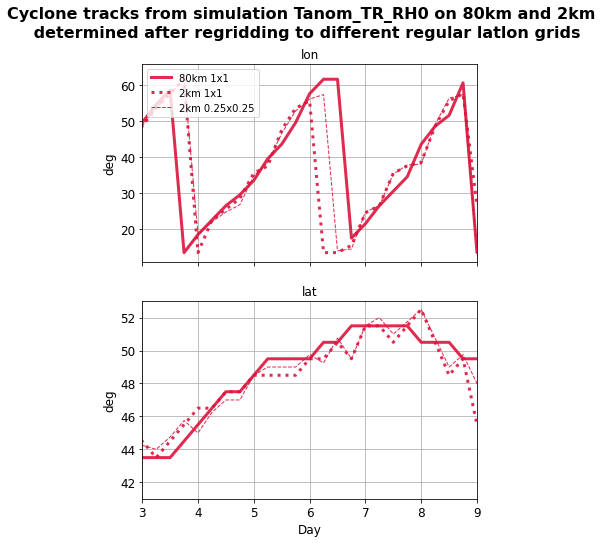

In [19]:
# Separating the two equations #
plt.rcParams['savefig.facecolor']='white'
# Eq.1 ------
# color codes for sims defined by TC
#colors={1:'dimgray',2:'gold',3:'mediumseagreen',4:'darkorange',5:'crimson',6:'royalblue'}
colors={1:'crimson',2:'crimson',3:'crimson'}
lstyle={1:'solid',2:'dotted',3:'dashed'}
lw={1:3,2:3,3:1}

fig, ax = plt.subplots(2, 1, figsize=(6,8), sharex=True, sharey=False)
for i in range(1,4): # loop over simulations
    ax[0].plot(dur[str_regridded_sim[i]], lon[str_regridded_sim[i]], color=colors[i],
               linewidth=lw[i], label=str_grid[i], alpha=0.9, linestyle=lstyle[i])
    ax[1].plot(dur[str_regridded_sim[i]], lat[str_regridded_sim[i]], color=colors[i],
               linewidth=lw[i], label=str_grid[i], alpha=0.9, linestyle=lstyle[i])
    
ax[0].set_title('lon')
ax[1].set_title('lat')

for r in range(0,2): 
    ax[r].yaxis.grid()
    ax[r].xaxis.grid()
    ax[r].tick_params(axis='both', which='major', labelsize=12)
    ax[r].set_xlim((3, 9))
    ax[r].set_ylabel('deg', fontsize=12)
    
    if r==1:
        ax[r].set_xlabel('Day', fontsize=12)
        ax[r].set_ylim((41,53))
        
ax[0].legend(ncol=1, loc='upper left')

plt.subplots_adjust(wspace = 0.14)
fig.suptitle('Cyclone tracks from simulation Tanom_TR_RH0 on 80km and 2km \n determined after regridding to different regular latlon grids',fontsize=16, weight='bold')

plt.savefig('/home/b/b380782/CyclEx_figs/Cyclone_track_timeseries_Tanom_TR_RH0_compare_regridding_2km_80km.png',
               bbox_inches='tight',dpi=100)
plt.show()

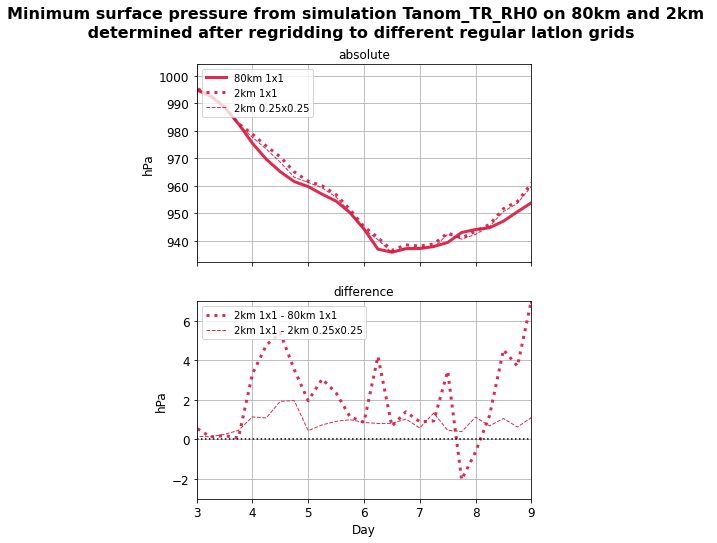

In [17]:
# Separating the two equations #
plt.rcParams['savefig.facecolor']='white'
# Eq.1 ------
# color codes for sims defined by TC
#colors={1:'dimgray',2:'gold',3:'mediumseagreen',4:'darkorange',5:'crimson',6:'royalblue'}
colors={1:'crimson',2:'crimson',3:'crimson'}
lstyle={1:'solid',2:'dotted',3:'dashed'}
lw={1:3,2:3,3:1}


fig, ax = plt.subplots(2, 1, figsize=(6,8), sharex=True, sharey=False)
for i in range(1,4): # loop over simulations
    ax[0].plot(dur[str_regridded_sim[i]], pmin[str_regridded_sim[i]], color=colors[i],
               linewidth=lw[i], label=str_grid[i], alpha=0.9, linestyle=lstyle[i])

ax[1].plot(dur[str_regridded_sim[i]], pmin[str_regridded_sim[2]]-pmin[str_regridded_sim[1]], color=colors[3],
               linewidth=lw[2], label='2km 1x1 - 80km 1x1', alpha=0.9, linestyle=lstyle[2])
ax[1].plot(dur[str_regridded_sim[i]], pmin[str_regridded_sim[2]]-pmin[str_regridded_sim[3]], color=colors[3],
               linewidth=lw[3], label='2km 1x1 - 2km 0.25x0.25', alpha=0.9, linestyle=lstyle[3])
    
ax[0].set_title('absolute')
ax[1].set_title('difference')

for r in range(0,2): 
    ax[r].yaxis.grid()
    ax[r].xaxis.grid()
    ax[r].tick_params(axis='both', which='major', labelsize=12)
    ax[r].set_xlim((3, 9))
    ax[r].set_ylabel('hPa', fontsize=12)
    ax[r].legend(ncol=1, loc='upper left')
    
    if r==1:
        ax[r].set_xlabel('Day', fontsize=12)
        ax[r].axhline(y=0,linestyle=':', color='k')
        ax[r].set_ylim((-3, 7))
        


plt.subplots_adjust(wspace = 0.14)
fig.suptitle('Minimum surface pressure from simulation Tanom_TR_RH0 on 80km and 2km \n determined after regridding to different regular latlon grids',fontsize=16, weight='bold')

plt.savefig('/home/b/b380782/CyclEx_figs/Pmin_timeseries_Tanom_TR_RH0_compare_regridding_2km_80km.png',
               bbox_inches='tight',dpi=100)
plt.show()